# Arbre de regression

Les arbres de régression sont un type de modèle particulier pour lequel nous avons un modèle prédictif discontinu. Cependant la séparation se fait de façon non adaptée aux problèmes mécatroniques.
Ci dessous nous allons tenter de conroler la génération de ces modèles.

## Postulats de départ
$X_{cat}$ le vecteur avec les points catalogue. Chaque point catalogue étant inclus dans $\mathbb{R}^n$



Nous cherchons un modèle tel que 


$F(X)=X_{selectionné}$ avec $X_{selectionné} \in X_{cat}$
avec soit critère 1 :
$$x_{selectionné} > x $$
critère 2 :
$$x_{selectionné} < x $$ 

**Protocole :** 
0. Récupération des données d'entrainement
0. Ajout de points fictifs
0. Entrainement
0. Prediction

## Algorithme d'ajout des points fictifs
- Pour chaque point:
    - Pour chaque composante k :
    
    Nous ajoutons un point au vecteur d'entrée telle que ce point soit égal à $X_{new} = X_i + \epsilon$
    avec $\epsilon \in \mathbb{R}^n$ et définit tel que :
    
        $\epsilon_i = 0$ if $i\ne k$
        
        $\epsilon_i = p$ if $i\ne k$
        
        et $p<0$ pour le cas 1, sinon $p>0$ pour le cas 2;
        avec $p\approx0$
        
    Nous ajoutons un point au vecteur de sortie correspondant à celui lié à $X_i$



In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
try:
    import seaborn as sns
    sns.set_style('dark')
except ImportError:
    print("On utilise seulement matplotlib")

In [19]:
# =================================================
# PARAMETRES DU MODELE
XMIN = -1.
XMAX = 1.
NB_PTS = 20
RANDOM_WEIGHT = 0.1
DEGREE = 2
SIZE = (15,10) # plot size
EPSILON = 1e-3
# =================================================

x = np.linspace(XMIN,XMAX,NB_PTS).reshape(-1,1)
# On crée les variables dépendantes
# Elles vont correspondre à un polynome de second ordre avec du bruit
y = (x+0.5)*(x-0.15) + RANDOM_WEIGHT*np.random.random(x.shape)

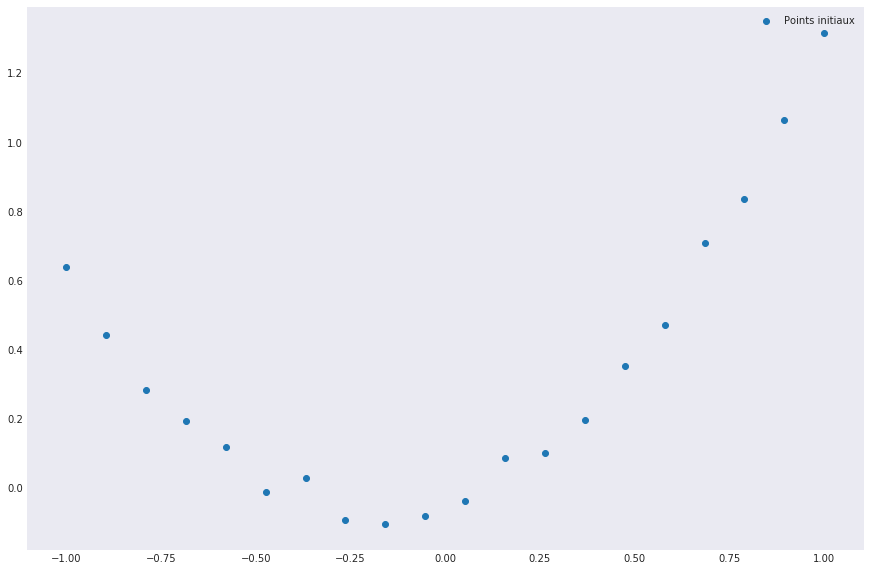

In [20]:
# Affichage des données
fig = plt.figure(figsize=SIZE)

plt.scatter(x,y,label="Points initiaux")
plt.legend()
plt.show()

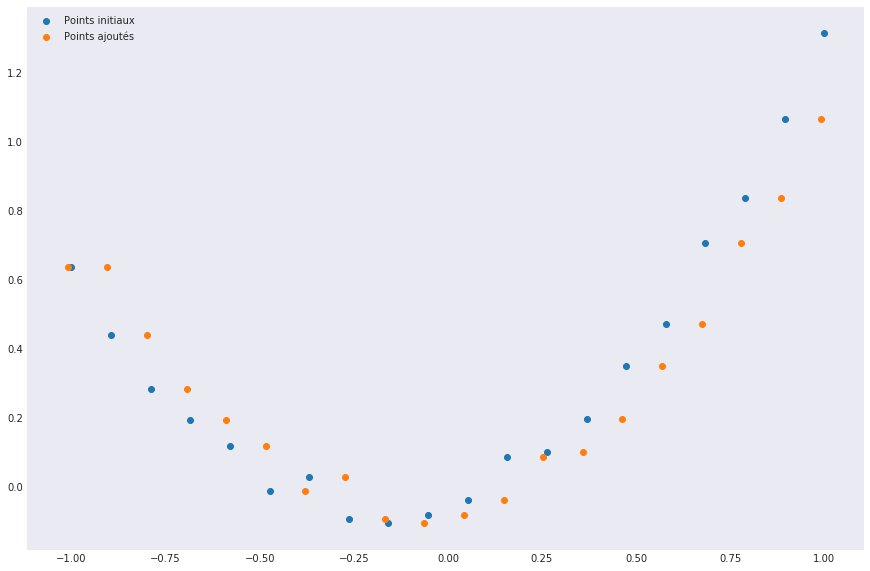

In [90]:
# Application de l'algorithme de projection
x_lower = []# cas 1
y_lower = []
added_points_x = []# pour l'affichage
added_points_y = []
for index,value in enumerate(x):
    x_lower.append(value)
    y_lower.append(y[index])
    
    x_lower.append(value-EPSILON)
    if index>0:
        y_lower.append(y[index-1])
    else:
        y_lower.append(y[index])
    # pour l'affichage seulement:
    if index>0:
        added_points_x.append(value-EPSILON*10) #*100 pour que l'affichage le montre
        added_points_y.append(y[index-1])
    else:
        added_points_x.append(value-EPSILON*10) #*100 pour que l'affichage le montre
        added_points_y.append(y[index])
        
    
# Conversion en numpy array
x_lower = np.array(x_lower).reshape(-1,1)
y_lower = np.array(y_lower).reshape(-1,1)
added_points_x = np.array(added_points_x).reshape(-1,1)
added_points_y = np.array(added_points_y).reshape(-1,1)

# Affichage des données
fig = plt.figure(figsize=SIZE)

plt.scatter(x,y,label="Points initiaux")
plt.scatter(added_points_x,added_points_y,label="Points ajoutés")
plt.legend()
plt.show()

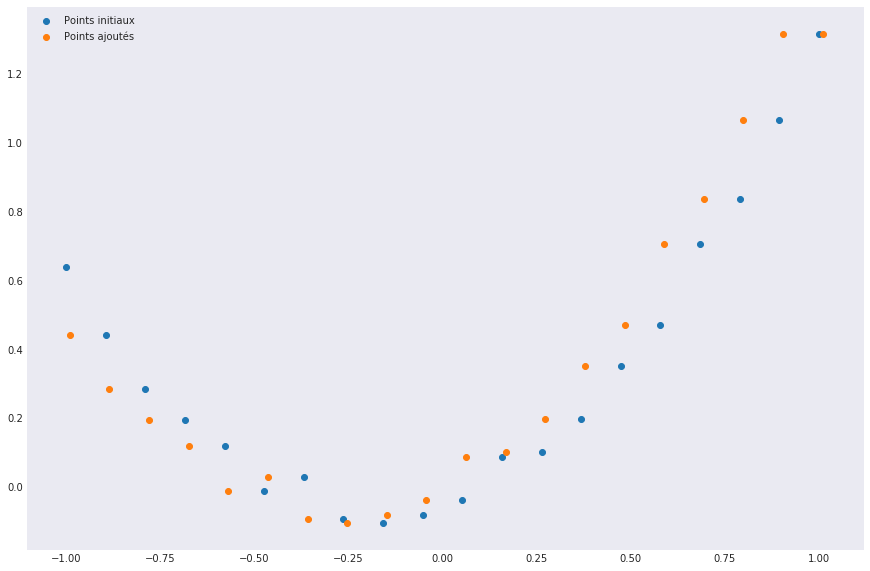

In [91]:
# Application de l'algorithme de projection
x_upper = []# cas 2
y_upper = []
added_points_x = []# pour l'affichage
added_points_y = []
for index,value in enumerate(x):
    x_upper.append(value)
    y_upper.append(y[index])
    x_upper.append(value+EPSILON)
    if index <len(x)-1:
        y_upper.append(y[index+1])
    else:
        y_upper.append(y[index])
    # pour l'affichage seulement:
    if index <len(x)-1:
        added_points_x.append(value+EPSILON*10) #*10 pour que l'affichage le montre correctement
        added_points_y.append(y[index+1])
    else:
        added_points_x.append(value+EPSILON*10) #*10 pour que l'affichage le montre correctement
        added_points_y.append(y[index])
    
# Conversion en numpy array
x_upper = np.array(x_upper).reshape(-1,1)
y_upper= np.array(y_upper).reshape(-1,1)
added_points_x = np.array(added_points_x).reshape(-1,1)
added_points_y = np.array(added_points_y).reshape(-1,1)

# Affichage des données
fig = plt.figure(figsize=SIZE)

plt.scatter(x,y,label="Points initiaux")
plt.scatter(added_points_x,added_points_y,label="Points ajoutés")
plt.legend()
plt.show()

## Construction du modèle

In [92]:
from sklearn.tree import DecisionTreeRegressor

# Cas témoin
model_normal = DecisionTreeRegressor()
model_normal.fit(x,y)

# Cas 1
model_lower = DecisionTreeRegressor()
model_lower.fit(x_lower,y_lower)

# Cas 2
from sklearn.tree import DecisionTreeRegressor

model_upper = DecisionTreeRegressor()
model_upper.fit(x_upper,y_upper)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Affichage du résultat

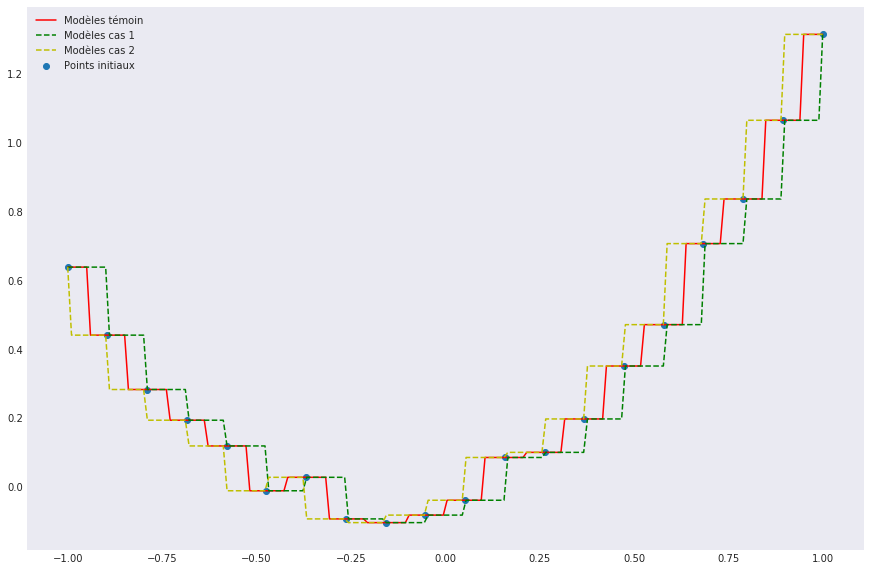

In [97]:
x_grid = np.linspace(XMIN,XMAX,NB_PTS*10).reshape(-1,1)
y_pred = model_normal.predict(x_grid)
y_pred_lower = model_lower.predict(x_grid)
y_pred_upper = model_upper.predict(x_grid)

fig = plt.figure(figsize=SIZE)

plt.plot(x_grid,y_pred,label="Modèles témoin",color="r")
plt.plot(x_grid,y_pred_lower,'--',label="Modèles cas 1",color="g")
plt.plot(x_grid,y_pred_upper,'--',label="Modèles cas 2",color="y")

plt.scatter(x,y,label="Points initiaux")
plt.legend()
plt.show()

# [Retour au sommaire de la partie](modeles_presentation.ipynb)